In [2]:
import numpy as np
from numpy import *
from numpy import nan
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
# %pylab
# pd.set_option('display.mpl_style', 'default')
# import scipy.integrate
plt.style.use(astropy_mpl_style)

In [3]:
#Need to get rid of 0 points (non readings) and bad readings
def FancyPlot(xlab='',ylab='',lw=2.5,lfs=45,tfs=30,size_x=13,size_y=12):
    plt.rcParams['axes.linewidth']=lw
    plt.rc_context({'xtick.color':'black', 'ytick.color':'black'})
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    fig = plt.figure(figsize=(size_x,size_y))
    ax=fig.add_subplot(111)
    ax.set_xlabel(xlab,fontsize=lfs)
    ax.set_ylabel(ylab,fontsize=lfs)
    ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7,color='black')
    ax.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    return fig,ax
def HexPlot(xlab1='',ylab1='',xlab2='',ylab2='',xlab3='',ylab3='',\
           wspace=0.25,lw=2.5,lfs=45,tfs=25,size_x=20,size_y=7,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    fig,axarr =plt.subplots(1,3,figsize=(size_x,size_y))
    gs=gridspec.GridSpec(1,3)
    gs.update(wspace=wspace)
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    ax3=plt.subplot(gs[2])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax3.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax3.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    
    ax3.set_xlabel(xlab3,fontsize=lfs)
    ax3.set_ylabel(ylab3,fontsize=lfs)
    
    return fig,ax1,ax2,ax3
def StackedPlot(xlab1='',ylab1='',xlab2='',ylab2='',\
                hspace=0.0,lw=2.5,lfs=45,tfs=30,size_x=20,size_y=11,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    
    fig,axarr =plt.subplots(2,1,figsize=(size_x,size_y),sharex=True,sharey=True)
    gs=gridspec.GridSpec(2,1,height_ratios=(9, 1))
    gs.update(hspace=hspace)
    
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=0,color='black')
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=0,color='black')
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax2.set_xticks([3,4,5,6,7,8])
#     ax2.
#     ax2.set_xlim
    
    ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
#     ax1.tick_params(axis='x', labelsize= tfs,color='black')
    ax1.yaxis.label.set_color('black')
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    ax2.xaxis.label.set_color('black')
#     ax.tick_params(axis='y', labelsize= tfs, color='black')
    if Grid:
        axs[0].grid()
        axs[1].grid()
    return fig,ax1,ax2

In [55]:
# %%capture
path = os.path.expanduser('~/Documents/highz/')

Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat')) 
errlosSFR2=[]
errhisSFR2=[]

errloSM2=[]
errhiSM2=[]

errloSFR2=[]
errhiSFR2=[]

for Treesa in range(76):
#     potato=str(20366)
    potato=str(Montague['id'][Treesa])
    galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+potato+'.sed'),index_col=0,on_bad_lines='skip')
    short = galaxy_sed.drop(galaxy_sed.index[[0,1,2,3,4,5,6,7,8]])
    short2 = pd.DataFrame(columns=['Name'])
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    galaxy_fit2 = pd.DataFrame(columns=['Full'])
    Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
    lambda_c =Filters['$\lambda_c$']
    galaxy_fit3 = pd.DataFrame(columns=[])
    galaxy_fit_s = galaxy_fit.drop(galaxy_fit.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]])

 ################################################   
    

    
    for i in range(len(galaxy_fit_s)):
        line = galaxy_fit_s.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=1:
    #         galaxy_fit3 = galaxy_fit3.reset_index(drop=True)
            ok=pd.DataFrame(line)
            galaxy_fit3=pd.concat([galaxy_fit3,ok],axis=1)
            continue

        str_line = " ".join(str(item) for item in line)
        galaxy_fit3.loc[i]=str(str_line)


    Properties=galaxy_fit3.T
    Properties.rename(columns={0:'A',1:'B',2:'C',3:'D',4:'E'}, inplace=True)
    Properties.reset_index(inplace=True,drop=True)
    for col in Properties.select_dtypes(['object']):
        Properties[col] = pd.to_numeric(Properties[col].str.rstrip('%'), errors='coerce')
        
    
#     fig,ax1,ax2,ax3=HexPlot(r'sSFR',r'Probability',r'Stellar Mass','',r'SFR',wspace=0.20)

#     ax1.plot(Properties.iloc[232:302]['A'],Properties.iloc[232:302]['B'],label='sSFR')
# #     ax1.hist(Properties.iloc[232:302]['B'],bins=20)
#     damn =max(Properties.iloc[232:302]['B'])
#     prac =array([damn/4,damn/2,damn,damn/2,damn/4,nan])
#     ax1.bar(Properties.T[303],prac,alpha=0.3,color='green',width=0.2)
# #     plt.figure(2)
# #     ax1.scatter(Percentiles_sSFR,Properties.T[254])
#     ax2.plot(Properties.iloc[305:375]['A'],Properties.iloc[305:375]['B'],label='Stellar Mass')
#     damn2=max(Properties.iloc[305:375]['B'])
#     prac2=array([damn2/4,damn2/2,damn2,damn2/2,damn2/4,nan])
# #     ax2.hist(Properties.iloc[305:375]['B'],bins=20)
#     ax2.bar(Properties.T[376],prac2,alpha=0.3,color='green',width=0.2)
# #     ax3.hist(Properties.iloc[603:663]['B'],bins=20)
# #     ax3.scatter(Properties.T[664],crap)
# #     plt.figure(3)
#     ax3.plot(Properties.iloc[735:795]['A'],Properties.iloc[735:795]['B'],label='SFR')
#     damn3=max(Properties.iloc[735:795]['B'])
#     prac3=array([damn3/4,damn3/2,damn3,damn3/2,damn3/4,nan])
#     ax3.bar(Properties.T[796],prac3,alpha=0.3,color='green',width=0.2)
# #     plt.figure(4)
#     plt.savefig(potato+'Stellar Histograms'+'-MAGPHYS',bbox_inches='tight')
#     fig,ax1,ax2,ax3=HexPlot(r'Dust Luminosity',r'Probability',r'Dust Attenuation','',r'Dust Mass',wspace=0.20)
#     ax1.plot(Properties.iloc[378:448]['A'],Properties.iloc[378:448]['B'],label='Dust Luminosity')
# #     plt.figure(5)
# #     ax1.hist(Properties.iloc[378:448]['B'],bins=20)
#     damn4=max(Properties.iloc[378:448]['B'])
#     prac4=array([damn4/4,damn4/2,damn4,damn4/2,damn4/4,nan])
#     ax1.bar(Properties.T[449],prac4,alpha=0.3,color='green',width=0.2)
#     ax2.plot(Properties.iloc[589:669]['A'],Properties.iloc[589:669]['B'],label='Dust Attenuation')
#     damn5=max(Properties.iloc[589:669]['B'])
#     prac5=array([damn5/4,damn5/2,damn5,damn5/2,damn5/4,nan])
# #     ax2.hist(Properties.iloc[318:329]['B'],bins=20)
#     ax2.bar(Properties.T[670],prac4,alpha=0.3,color='green',width=0.2)
# #     ax3.hist(Properties.iloc[540:600]['B'],bins=20)
# #     ax3.scatter(Properties.T[601],crap)
# #     plt.figure(6)
#     ax3.plot(Properties.iloc[672:732]['A'],Properties.iloc[672:732]['B'],label='Dust Mass')
#     damn6=max(Properties.iloc[672:732]['B'])
#     prac6=array([damn6/4,damn6/2,damn6,damn6/2,damn6/4,nan])
#     ax3.bar(Properties.T[733],prac6,alpha=0.3,color='green',width=0.2)
#     plt.savefig(potato+'Dust Histograms'+'-MAGPHYS',bbox_inches='tight')
    errlosSFR=(Properties.iloc[303,0])
    errhisSFR=(Properties.iloc[303,4])

    errlosSFR2.append(errlosSFR)
    errhisSFR2.append(errhisSFR)

    errloSM=(Properties.iloc[376,0])
    errhiSM=(Properties.iloc[376,4])

    errloSM2.append(errloSM)
    errhiSM2.append(errhiSM)

    errloSFR=(Properties.iloc[796,0])
    errhiSFR=(Properties.iloc[796,4])

    errloSFR2.append(errloSFR)
    errhiSFR2.append(errhiSFR)

In [26]:
# for i in range(5):
#     errlosSFR=([Properties.iloc[303,0]])
#     errhisSFR=([Properties.iloc[303,4]])

#     errlosSFR2.append(errlosSFR)
#     errhisSFR2.append(errhisSFR)

#     errloSM=([Properties.iloc[376,0]])
#     errhiSM=([Properties.iloc[376,4]])

#     errloSM2.append(errloSM)
#     errhiSM2.append(errhiSM)

#     errloSFR=([Properties.iloc[796,0]])
#     errhiSFR=([Properties.iloc[796,4]])

#     errloSFR2.append(errloSFR)
#     errhiSFR2.append(errhiSFR)
Properties.iloc[303]

A   -7.925
B   -7.925
C   -7.925
D   -7.925
E   -7.925
5      NaN
Name: 303, dtype: float64

In [57]:
# h5kerrlosSFR2=errlosSFR2
# h5kerrhisSFR2=errhisSFR2

# h5kerrloSM2=errloSM2
# h5kerrhiSM2=errhiSM2

# h5kerrloSFR2=errloSFR2
# h5kerrhiSFR2=errhiSFR2

x = np.array(errlosSFR2)-np.array(errhisSFR2)
# np.count_nonzero(x)
np.where(x==0)[0]

array([ 2,  5,  8,  9, 12, 13, 20, 26, 27, 28, 29, 32, 34, 36, 39, 41, 42,
       43, 45, 46, 52, 56, 57, 58, 62, 64, 67, 72, 73])

In [76]:
Montagood=Montague.loc[np.where(x!=0)[0]]
# Montabad.to_csv('Montabad.csv')
Montagood.to_csv('Montagood.csv')

In [74]:
bruh=pd.read_csv('Montabad.csv')
bruh
# bruh.drop(['Unnamed:0'])

,id,redshift,WFI_U38,WFI_U38*,U,U*,B,B*,IA484,IA484*,...,KsHI,KsHI*,IRAC_36,IRAC_36*,IRAC_45,IRAC_45*,IRAC_58,IRAC_58*,IRAC_80,IRAC_80*
0,12533,3.545,2.333313e-08,1.477947e-07,-7.224740e-09,1.570299e-08,2.574843e-07,3.538580e-08,7.198379e-07,5.055784e-08,...,0.000003,7.913625e-08,2.013745e-06,5.472700e-08,3.187537e-06,6.984398e-08,2.739770e-06,5.843974e-07,4.351360e-06,7.036131e-07
1,14808,3.673,1.772379e-08,1.474667e-07,-2.904739e-08,1.581820e-08,1.758542e-07,4.852924e-08,4.812515e-07,4.939888e-08,...,0.000001,1.131548e-07,9.325279e-07,7.569484e-08,8.890188e-07,7.227308e-08,1.544797e-06,7.025828e-07,9.235091e-07,8.186632e-07
2,17342,3.501,2.360614e-08,1.436963e-07,3.533149e-09,1.411587e-08,1.722567e-07,4.669235e-08,3.506724e-07,5.028558e-08,...,0.000001,8.785136e-08,3.122288e-07,4.373754e-08,3.337348e-07,4.767790e-08,7.789621e-07,4.949929e-07,-9.154311e-07,5.875897e-07
3,18561,3.512,-5.659204e-08,1.202786e-07,3.994257e-09,1.303128e-08,1.109971e-07,4.188671e-08,3.747796e-07,4.642513e-08,...,0.000002,1.033079e-07,3.133849e-07,7.117478e-08,5.689498e-07,8.812759e-08,-4.156682e-08,6.700766e-07,2.978803e-07,8.039397e-07
4,21442,3.209,1.017235e-07,1.182893e-07,2.252141e-07,1.128167e-08,8.633475e-07,4.370121e-08,1.016027e-06,4.728369e-08,...,0.000006,2.729827e-07,1.671489e-06,8.240133e-08,2.403463e-06,7.788838e-08,1.787738e-06,1.051436e-06,6.863124e-07,1.185362e-06
5,22768,3.198,1.525675e-07,1.022094e-07,4.656225e-08,1.165885e-08,2.497274e-07,3.932445e-08,2.832726e-07,4.133669e-08,...,0.000001,1.233044e-07,2.364284e-07,6.019907e-08,4.220389e-07,5.222733e-08,1.781505e-06,7.192869e-07,-2.904897e-07,7.934615e-07
6,11398,3.545,4.247137e-08,1.380282e-07,-3.001701e-09,1.565431e-08,1.535642e-07,4.504823e-08,3.144777e-07,4.773630e-08,...,0.000001,7.585591e-08,7.123082e-07,5.289830e-08,8.462703e-07,7.273780e-08,2.933330e-07,6.249865e-07,-5.776704e-07,7.670747e-07
7,15992,3.626,-7.130433e-08,1.668389e-07,-9.832365e-09,1.553993e-08,1.699675e-07,5.653892e-08,8.877666e-07,6.076709e-08,...,0.000003,1.226177e-07,1.940125e-06,5.939267e-08,2.023469e-06,8.676099e-08,1.373741e-06,5.673512e-07,6.485407e-07,6.787168e-07
8,17195,3.512,1.520199e-07,1.501889e-07,-1.496272e-08,1.454491e-08,1.531832e-07,7.348842e-08,3.485085e-07,5.851901e-08,...,0.000002,1.313323e-07,1.108645e-06,5.860598e-08,1.198497e-06,8.828687e-08,1.000373e-06,6.494169e-07,8.203059e-07,7.843986e-07
9,17583,2.736,1.008762e-06,1.394083e-07,9.569495e-07,1.386974e-08,1.450781e-06,4.992103e-08,1.679560e-06,5.030431e-08,...,0.000001,1.289463e-07,1.401398e-06,5.022018e-08,1.411805e-06,4.994152e-08,1.046052e-06,5.223758e-07,6.381613e-07,6.193451e-07


In [49]:
(76-47)/76

0.3815789473684211

In [51]:
abs(4627-4998)/4998

0.0742296918767507

In [44]:
np.count_nonzero([0,0,1])

AttributeError: module 'numpy' has no attribute 'count_zero'

In [38]:
print(errlosSFR2[0])
print(errhisSFR2[0])

-10.92
-10.52


In [ ]:
big2=pd.read_csv(os.path.expanduser(path+'Whoa_what2.csv'),index_col=0) #before quality cuts
big2

In [17]:
Montague

,id,redshift,WFI_U38,WFI_U38*,U,U*,B,B*,IA484,IA484*,...,KsHI,KsHI*,IRAC_36,IRAC_36*,IRAC_45,IRAC_45*,IRAC_58,IRAC_58*,IRAC_80,IRAC_80*
0,20366,3.531,-5.483530e-08,1.474157e-07,-1.920218e-08,1.451277e-08,7.295418e-08,4.555906e-08,1.635098e-07,5.289903e-08,...,0.000001,8.281339e-08,4.112125e-07,6.862928e-08,6.071316e-07,7.582515e-08,8.668196e-07,7.398355e-07,7.158663e-07,8.068668e-07
1,11462,3.810,-1.730741e-07,1.412119e-07,9.688624e-09,1.539731e-08,1.848744e-07,5.248104e-08,3.709731e-07,4.790290e-08,...,0.000001,7.503430e-08,1.032816e-06,5.747703e-08,1.045007e-06,7.816256e-08,1.214578e-06,5.568519e-07,7.637654e-08,7.231276e-07
2,12533,3.545,2.333313e-08,1.477947e-07,-7.224740e-09,1.570299e-08,2.574843e-07,3.538580e-08,7.198379e-07,5.055784e-08,...,0.000003,7.913625e-08,2.013745e-06,5.472700e-08,3.187537e-06,6.984398e-08,2.739770e-06,5.843974e-07,4.351360e-06,7.036131e-07
3,12552,3.195,2.037470e-07,1.582617e-07,3.017830e-08,1.451277e-08,2.027072e-07,4.905671e-08,2.296839e-07,5.345366e-08,...,0.000001,1.154762e-07,4.336314e-07,5.120638e-08,4.564604e-07,8.840882e-08,2.681679e-07,5.419443e-07,5.906111e-07,6.350032e-07
4,12903,3.097,-4.104241e-08,1.356079e-07,1.025226e-07,1.521109e-08,2.558894e-07,4.313636e-08,4.045890e-07,4.792344e-08,...,0.000001,7.887600e-08,4.230969e-07,5.300548e-08,4.440168e-07,5.839714e-08,-4.293243e-08,6.100103e-07,-1.528582e-06,7.586705e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,23511,3.444,2.185058e-07,1.326686e-07,4.220002e-08,1.319516e-08,3.272125e-07,3.325447e-08,3.978211e-07,5.191365e-08,...,0.000002,1.661526e-07,1.105822e-06,6.076241e-08,1.239654e-06,5.351259e-08,7.309251e-07,7.187574e-07,1.310132e-06,8.175869e-07
72,24259,3.509,2.870201e-07,1.222908e-07,-1.987640e-08,1.151945e-08,1.598638e-07,4.379015e-08,4.137364e-07,4.881014e-08,...,0.000003,2.130971e-07,1.125124e-06,6.486456e-08,1.580001e-06,5.684973e-08,1.516494e-06,8.260732e-07,1.083821e-06,9.146839e-07
73,26616,3.521,-9.196342e-08,1.400892e-07,-7.649950e-09,1.319020e-08,1.309476e-07,4.922996e-08,4.295332e-07,5.114637e-08,...,0.000003,2.545299e-07,1.576643e-06,9.733535e-08,1.860037e-06,1.062550e-07,1.256860e-06,8.000680e-07,2.121381e-06,9.078576e-07
74,27445,2.615,7.292188e-07,1.161839e-07,6.866668e-07,1.400810e-08,9.665539e-07,4.115271e-08,1.036937e-06,4.674819e-08,...,0.000002,1.599631e-07,3.056831e-06,7.022924e-08,2.395153e-06,6.562173e-08,3.934005e-06,7.159287e-07,3.368677e-06,8.262652e-07


In [18]:
Montague2

,id,redshift,WFI_U38,WFI_U38*,U,U*,B,B*,IA484,IA484*,...,KsHI,KsHI*,IRAC_36,IRAC_36*,IRAC_45,IRAC_45*,IRAC_58,IRAC_58*,IRAC_80,IRAC_80*
0,1368,2.5687,5.435606e-07,1.872200e-07,8.787606e-07,1.554915e-08,-0.000099,-0.000099,0.000002,5.883347e-08,...,-0.000099,-0.000099,0.000004,1.022617e-07,0.000004,1.440515e-07,0.000004,9.800182e-07,0.000004,0.000001


In [29]:
# Properties.T[302
#             ]
# plt.plot(array([1,2,3,4,5]),array([2,2,2,2,2]))
# galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
# galaxy_fit2 = pd.DataFrame(columns=['Full'])
# Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
# galaxy_fit

""
# OBSERVED FLUXES (and errors):
# WFI_U38 U B IA484 IA527 WFI_V IA574 V IA598 IA624 R WFI_Rc IA651 IA679 IA738 IA767 I IA797 F814W IA856 Z F098M J1 F105W J2 NB118 F125W J3 F140W F160W Hs Hl NB209 Ks tenisK KsHI IRAC_36 IRAC_45 IRAC_58 IRAC_80
-3.620E-06 -1.268E-06 4.816E-06 1.079E-05 1.752E-05 2.860E-05 3.333E-05 2.776E-05 2.895E-05 2.969E-05 2.908E-05 2.883E-05 2.340E-05 2.567E-05 3.836E-05 5.731E-06 2.742E-05 3.791E-05 2.811E-05 -4.483E-06 2.961E-05 -6.536E-03 1.250E-05 2.781E-05 7.289E-06 6.317E-05 2.733E-05 6.245E-06 3.338E-05 3.013E-05 6.344E-06 6.575E-05 -1.086E-04 6.462E-05 7.042E-05 8.891E-05 2.715E-05 4.008E-05 5.722E-05 4.726E-05
9.732E-06 9.581E-07 3.008E-06 3.492E-06 3.654E-06 3.545E-06 9.261E-06 2.728E-06 3.553E-06 4.118E-06 1.454E-06 3.170E-06 3.230E-06 4.078E-06 4.429E-06 1.126E-05 5.125E-06 1.272E-05 2.799E-06 1.688E-05 6.811E-06 -6.536E-03 1.393E-05 3.966E-06 1.420E-05 3.349E-05 3.498E-06 1.640E-05 1.183E-05 4.152E-06 2.435E-05 2.432E-05 6.066E-05 3.683E-05 1.933E-05 5.467E-06 4.531E-06 5.006E-06 4.884E-05 5.327E-05
#
# ... Results of fitting the fluxes to the model.....
...
67.5000 6.906E-002
72.5000 3.941E-002
77.5000 1.294E-002


In [32]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# Properties.head(1156)
for i in range(len(galaxy_fit)):
        line = galaxy_fit.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=40:
            continue
        str_line = " ".join(str(item) for item in line)
        galaxy_fit2.loc[i]=str(str_line)


names = []
for i in range(len(Filters['Name'])):
    names.append(Filters.iloc[i,0])
names
galaxy_fit2[names] = galaxy_fit2['Full'].str.split(" ",expand=True,)
galaxy_fit2=galaxy_fit2.drop(['Full'],axis=1)

In [26]:
len(names)
# Properties.T[376]

32

(array([34., 18.,  9.,  4.,  2.,  3.,  1.,  2.,  1.,  0.,  1.,  0.,  0.,
         0.,  1.]),
 array([ 0.826     ,  2.27066667,  3.71533333,  5.16      ,  6.60466667,
         8.04933333,  9.494     , 10.93866667, 12.38333333, 13.828     ,
        15.27266667, 16.71733333, 18.162     , 19.60666667, 21.05133333,
        22.496     ]),
 <BarContainer object of 15 artists>)

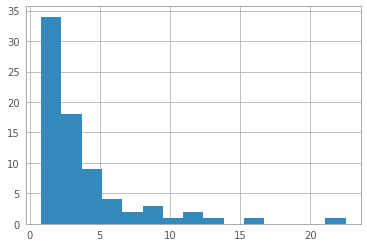

In [7]:
plt.hist(chestnut1,bins=15)

In [11]:
# Properties.iloc[305:377]
%store chestnut1
%store sunshine1
%store rainbow1

Stored 'chestnut1' (list)
Stored 'sunshine1' (list)
Stored 'rainbow1' (list)


In [9]:
# damn =max((Properties.iloc[232:302]['B']))
# damn